In [10]:
from sympy import *
import mpmath
import matplotlib.pyplot as plt
import numpy as np

In [11]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
init_printing()

In [12]:
# theta, epsilon, u, T, L, l, Dw, Dv, g, a, b, c, m, I, x, y = symbols('theta epsilon u T L l D_w D_v g a b c m I x y')
theta, epsilon, u, T, L, g, a, b, c, m, I, x, y = symbols('theta epsilon u T L g a b c m I x y')

In [13]:
def pseudo_abs(x):
    return sqrt(x**22 + epsilon) - sqrt(epsilon)

In [14]:
v = sqrt(a**2 + b**2)
phi = atan2(b,a)

xdot = a
ydot = b
thetadot= c

# With drag
# adot = 1/m * (-sin(theta + u) * T + sin(phi) * v**2 * pseudo_abs(sin(theta - phi)) * Dv)
# bdot = 1/m * (cos(theta + u) * T - cos(phi) * v**2 * pseudo_abs(sin(theta - phi)) * Dv) - g
# cdot = 1/I * (sin(u) * T * L - pseudo_abs(c)*c * Dw + l*v**2 * sin(theta - phi) * Dv)

# Without drag
adot = 1/m * (-sin(theta + u) * T)
bdot = 1/m * (cos(theta + u) * T) - g
cdot = 1/I * (sin(u) * T * L)

In [15]:
pprint(adot)
pprint(bdot)
pprint(cdot)

-T⋅sin(θ + u) 
──────────────
      m       
T⋅cos(θ + u)    
──────────── - g
     m          
L⋅T⋅sin(u)
──────────
    I     


In [16]:
state_vec = Matrix([thetadot,adot, bdot, cdot])
# pprint(state_vec)

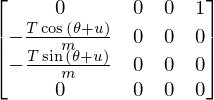

In [17]:
# jac = state_vec.jacobian(Matrix([x, y, theta, a, b, c]))
# jac_abs = state_vec_abs.jacobian(Matrix([x, y, theta, a, b, c]))
jac = state_vec.jacobian(Matrix([theta, a, b, c]))
jac

In [9]:
# drag parameters
l_real = 0.
Dv_real = 0.
Dw_real = 0.

# other params
L_real = -1
I_real = 1.
m_real = 1.
g_real = 10.
T_real = 10.
theta_real = 0
phi_real = 0.
epsilon_real = 1e-10
a_real = 0.
b_real = 1.
c_real = 0.

# with drag
# jac_subs = jac.subs(L,L_real).subs(l,l_real).subs(Dv, Dv_real).subs(Dw, Dw_real).subs(I, I_real).subs(m,m_real).subs(g,g_real).subs(T, T_real).subs(theta, theta_real).subs(phi,phi_real).subs(epsilon, epsilon_real).subs(a,a_real).subs(b,b_real).subs(c,c_real)

# without drag
jac_subs = jac.subs(L,L_real).subs(I, I_real).subs(m,m_real).subs(g,g_real).subs(theta, theta_real).subs(phi,phi_real).subs(epsilon, epsilon_real).subs(a,a_real).subs(b,b_real).subs(c,c_real)
jac_subs_np = np.array(jac_subs,dtype=np.float64)
jac_subs

TypeError: can't convert expression to float

In [ ]:
[evals, evecs] = np.linalg.eig(jac_subs_np)

In [ ]:
np.set_printoptions(linewidth=200, suppress=True)
# print(evals, '\n')
# print(evecs)
print(np.real(evals))
print(np.imag(evals),'\n')
print(np.real(evecs))
print(np.imag(evecs))
#[print(vec) for vec in np.real(evecs)]